# WeatherPy
----

#### Observable Trends
- Cities located near or south of the equator tend to have higher max weather temperatures.
- With a coefficient of -0.84, there is a strong correlation between latitude and max weather temperature in the northern hemisphere.
- With a coefficient of 0.22, there is a weak correlation between wind speed and latitude in the northern hemisphere.

In [27]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
import scipy.stats as st
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [28]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

cities

['klaksvik',
 'hobart',
 'guider',
 'cockburn town',
 'dolbeau',
 'dudinka',
 'karabuk',
 'ushuaia',
 'port elizabeth',
 'butaritari',
 'viligili',
 'kaitangata',
 'hermanus',
 'cabedelo',
 'atuona',
 'bulgan',
 'barbar',
 'busselton',
 'albany',
 'ramanuj ganj',
 'arraial do cabo',
 'vila velha',
 'taolanaro',
 'mataura',
 'khatanga',
 'east london',
 'faanui',
 'fortuna',
 'urumqi',
 'bredasdorp',
 'tsihombe',
 'puerto ayora',
 'lagoa',
 'cherskiy',
 'jaru',
 'bac lieu',
 'komsomolskiy',
 'hithadhoo',
 'padang',
 'mahebourg',
 'new norfolk',
 'avarua',
 'constitucion',
 'attawapiskat',
 'punta arenas',
 'kununurra',
 'sistranda',
 'saint george',
 'burnie',
 'husavik',
 'chokurdakh',
 'khilok',
 'palabuhanratu',
 'yellowknife',
 'rikitea',
 'phuntsholing',
 'kapaa',
 'kyrylivka',
 'okha',
 'barrow',
 'kodiak',
 'helena',
 'qaanaaq',
 'arkhipo-osipovka',
 'bambous virieux',
 'birjand',
 'scottsboro',
 'saleaula',
 'warrnambool',
 'adrar',
 'alice springs',
 'bolungarvik',
 'souillac',

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [29]:
# Build url

# url = f'api.openweathermap.org/data/2.5/weather?q={cities}&appid={API key}'
url = f'http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}'

response = requests.get(url).json()
print(json.dumps(response, indent=4, sort_keys=True))

{
    "base": "stations",
    "clouds": {
        "all": 67
    },
    "cod": 200,
    "coord": {
        "lat": -46.19,
        "lon": 168.86
    },
    "dt": 1605914781,
    "id": 6201424,
    "main": {
        "feels_like": 274.86,
        "humidity": 89,
        "pressure": 1006,
        "temp": 282.59,
        "temp_max": 282.59,
        "temp_min": 282.59
    },
    "name": "Mataura",
    "rain": {
        "1h": 0.44
    },
    "sys": {
        "country": "NZ",
        "id": 2008959,
        "sunrise": 1605891379,
        "sunset": 1605945890,
        "type": 3
    },
    "timezone": 46800,
    "visibility": 10000,
    "weather": [
        {
            "description": "light rain",
            "icon": "10d",
            "id": 500,
            "main": "Rain"
        }
    ],
    "wind": {
        "deg": 240,
        "gust": 18.33,
        "speed": 10.28
    }
}


In [30]:
# For loop to print cities

# Lists to hold info
city_name = []
lat = []
lng = []
temp_max = []
temp = []
humidity = []
clouds = []
wind = []
country = []
date = []


# Start count for cities and sets
city_count = 0
set_count = 1


url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = f"{url}&units=imperial&appid={weather_api_key}&q="
response = requests.get(url).json()

# Get City, Lat, Lng, Max, Temp, Humidity, Cloudiness, Wind Speed, Country, Date
for city in cities:
    try:
        if city_count == 50:
            city_count = 0
            set_count = set_count + 1
        response = requests.get(query_url + city).json()
        city_count = city_count + 1
        city_name.append(response["name"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        temp_max.append(response["main"]["temp_max"])
        temp.append(response["main"]["temp"])
        humidity.append(response["main"]["humidity"])
        clouds.append(response["clouds"]["all"])
        wind.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])      
    except:
        print("City not found. Skipping...")
    
    print(f'Processing Record {city_count} of Set {set_count} | {city}')

Processing Record 1 of Set 1 | klaksvik
Processing Record 2 of Set 1 | hobart
Processing Record 3 of Set 1 | guider
Processing Record 4 of Set 1 | cockburn town
City not found. Skipping...
Processing Record 5 of Set 1 | dolbeau
Processing Record 6 of Set 1 | dudinka
Processing Record 7 of Set 1 | karabuk
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | port elizabeth
Processing Record 10 of Set 1 | butaritari
City not found. Skipping...
Processing Record 11 of Set 1 | viligili
Processing Record 12 of Set 1 | kaitangata
Processing Record 13 of Set 1 | hermanus
Processing Record 14 of Set 1 | cabedelo
Processing Record 15 of Set 1 | atuona
Processing Record 16 of Set 1 | bulgan
City not found. Skipping...
Processing Record 17 of Set 1 | barbar
Processing Record 18 of Set 1 | busselton
Processing Record 19 of Set 1 | albany
Processing Record 20 of Set 1 | ramanuj ganj
Processing Record 21 of Set 1 | arraial do cabo
Processing Record 22 of Set 1 | vila velha
City not f

Processing Record 38 of Set 4 | narok
Processing Record 39 of Set 4 | hurghada
Processing Record 40 of Set 4 | samana
Processing Record 41 of Set 4 | port-cartier
Processing Record 42 of Set 4 | juneau
Processing Record 43 of Set 4 | puerto baquerizo moreno
Processing Record 44 of Set 4 | teguldet
Processing Record 45 of Set 4 | naze
Processing Record 46 of Set 4 | sorong
Processing Record 47 of Set 4 | los llanos de aridane
Processing Record 48 of Set 4 | brae
Processing Record 49 of Set 4 | bengkulu
Processing Record 50 of Set 4 | laguna
Processing Record 1 of Set 5 | thompson
Processing Record 2 of Set 5 | lismore
Processing Record 3 of Set 5 | luderitz
Processing Record 4 of Set 5 | aklavik
Processing Record 5 of Set 5 | bathsheba
Processing Record 6 of Set 5 | sitka
Processing Record 7 of Set 5 | biloela
Processing Record 8 of Set 5 | santiago del estero
Processing Record 9 of Set 5 | mount gambier
Processing Record 10 of Set 5 | gunnedah
Processing Record 11 of Set 5 | ponta do s

Processing Record 24 of Set 8 | ahipara
Processing Record 25 of Set 8 | makokou
Processing Record 26 of Set 8 | port lincoln
Processing Record 27 of Set 8 | tuatapere
Processing Record 28 of Set 8 | santa lucia
Processing Record 29 of Set 8 | rio gallegos
Processing Record 30 of Set 8 | jalu
Processing Record 31 of Set 8 | baglan
Processing Record 32 of Set 8 | torrelavega
Processing Record 33 of Set 8 | karratha
Processing Record 34 of Set 8 | praia da vitoria
Processing Record 35 of Set 8 | darhan
Processing Record 36 of Set 8 | tevaitoa
Processing Record 37 of Set 8 | itoman
Processing Record 38 of Set 8 | baley
Processing Record 39 of Set 8 | aksarka
Processing Record 40 of Set 8 | tukrah
Processing Record 41 of Set 8 | stornoway
Processing Record 42 of Set 8 | loubomo
Processing Record 43 of Set 8 | vao
Processing Record 44 of Set 8 | sorland
Processing Record 45 of Set 8 | pontianak
Processing Record 46 of Set 8 | victoria point
Processing Record 47 of Set 8 | yelizovo
Processing

Processing Record 16 of Set 12 | waingapu
Processing Record 17 of Set 12 | statesboro
Processing Record 18 of Set 12 | comodoro rivadavia
City not found. Skipping...
Processing Record 19 of Set 12 | xadani
Processing Record 20 of Set 12 | yarada
Processing Record 21 of Set 12 | baykit
Processing Record 22 of Set 12 | santiago de cao
Processing Record 23 of Set 12 | maua
Processing Record 24 of Set 12 | willmar
City not found. Skipping...
Processing Record 25 of Set 12 | kayfan
Processing Record 26 of Set 12 | san cristobal
Processing Record 27 of Set 12 | vila franca do campo
Processing Record 28 of Set 12 | lumeje
Processing Record 29 of Set 12 | peniche
Processing Record 30 of Set 12 | manggar
City not found. Skipping...
Processing Record 31 of Set 12 | bacuit
Processing Record 32 of Set 12 | tisul
Processing Record 33 of Set 12 | kemijarvi
Processing Record 34 of Set 12 | lyuban
Processing Record 35 of Set 12 | tura
Processing Record 36 of Set 12 | assiniboia
Processing Record 37 of

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
# Dataframe from script
weather_df = pd.DataFrame({
    "City": city_name,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": temp_max,
    "Humidity": humidity,
    "Cloudiness": clouds,
    "Wind Speed": wind,
    "Country": country,
    "Date": date
})

# Export data to csv as city_csv
weather_df.to_csv('../output_data/city_csv')

weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mossamedes,-15.20,12.15,68.85,66,44,10.51,AO,1605913570
1,Tuktoyaktuk,69.45,-133.04,14.00,92,90,6.93,CA,1605913671
2,Jamestown,42.10,-79.24,55.00,46,1,9.17,US,1605913497
3,Vestmannaeyjar,63.44,-20.27,41.86,77,100,32.79,IS,1605913708
4,Bethel,41.37,-73.41,55.40,43,1,6.80,US,1605913698
...,...,...,...,...,...,...,...,...,...
560,Puerto del Rosario,28.50,-13.86,71.60,43,0,6.93,ES,1605913912
561,Djibouti,11.50,42.50,77.00,69,1,12.24,DJ,1605913912
562,Povenets,62.85,34.83,32.20,95,92,10.58,RU,1605913912
563,Skibbereen,51.55,-9.27,50.00,93,75,19.46,IE,1605913912


In [31]:
# To avoid creating new dataset, run here after restarting kernel

file = '../output_data/city_csv'
weather_df = pd.read_csv(file)
weather_df

,Unnamed: 0,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,Mossamedes,-15.20,12.15,68.85,66,44,10.51,AO,1605913570
1,1,Tuktoyaktuk,69.45,-133.04,14.00,92,90,6.93,CA,1605913671
2,2,Jamestown,42.10,-79.24,55.00,46,1,9.17,US,1605913497
3,3,Vestmannaeyjar,63.44,-20.27,41.86,77,100,32.79,IS,1605913708
4,4,Bethel,41.37,-73.41,55.40,43,1,6.80,US,1605913698
...,...,...,...,...,...,...,...,...,...,...
560,560,Puerto del Rosario,28.50,-13.86,71.60,43,0,6.93,ES,1605913912
561,561,Djibouti,11.50,42.50,77.00,69,1,12.24,DJ,1605913912
562,562,Povenets,62.85,34.83,32.20,95,92,10.58,RU,1605913912
563,563,Skibbereen,51.55,-9.27,50.00,93,75,19.46,IE,1605913912


In [125]:
# Describe weather data
weather_stats = weather_df.describe()
weather_stats = weather_stats.drop(columns="Unnamed: 0")
weather_stats


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,5.650000e+02
mean,19.460814,16.013788,55.373398,73.837168,51.146903,8.755168,1.605914e+09
std,34.103716,91.467715,24.857612,19.448013,38.748251,6.839834,8.067578e+01
min,-54.800000,-175.200000,-13.000000,8.000000,0.000000,0.430000,1.605913e+09
25%,-8.880000,-64.350000,35.010000,66.000000,10.000000,3.650000,1.605914e+09
50%,22.680000,21.850000,64.000000,78.000000,49.000000,6.930000,1.605914e+09
75%,49.490000,93.300000,76.390000,88.000000,90.000000,11.810000,1.605914e+09
max,78.220000,179.320000,90.000000,100.000000,100.000000,47.200000,1.605914e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [86]:
# No cities with humidity over 100%
humid_cities = weather_df.loc[weather_df["Humidity"] > 100]
humid_cities

,Unnamed: 0,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

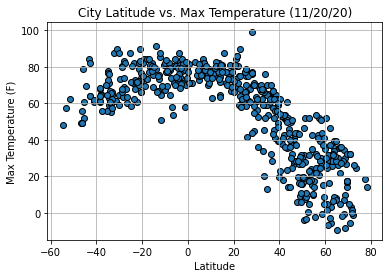

In [118]:
plt.scatter(lat, temp_max, edgecolors="black", )
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs. Max Temperature (11/20/20)")
plt.grid()
plt.show()

## Latitude vs. Humidity Plot

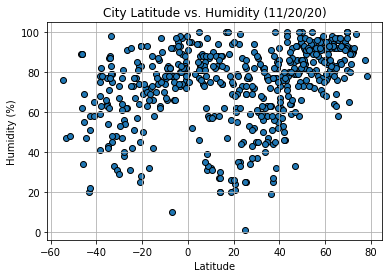

In [119]:
plt.scatter(lat, humidity, edgecolors="black", )
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (11/20/20)")
plt.grid()
plt.show()

## Latitude vs. Cloudiness Plot

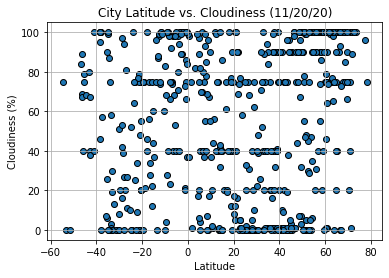

In [120]:
plt.scatter(lat, clouds, edgecolors="black", )
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (11/20/20)")
plt.grid()
plt.show()

## Latitude vs. Wind Speed Plot

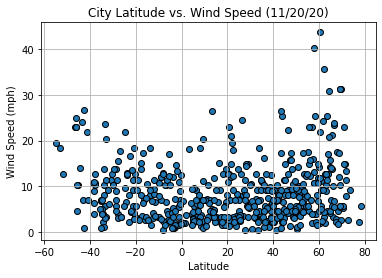

In [121]:
plt.scatter(lat, wind, edgecolors="black", )
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs. Wind Speed (11/20/20)")
plt.grid()
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [136]:
# Convert to integer for linear regression
weather_df["Max Temp"] = weather_df["Max Temp"]

# City latitudes in northern hemisphere only
north_df = weather_df.loc[weather_df["Lat"] >= 0]
north_hem = north_df["Lat"]

# Max temps of cities in northern hemisphere only
temp_max_north = north_df["Max Temp"]



The r-value is: -0.8467665561337243


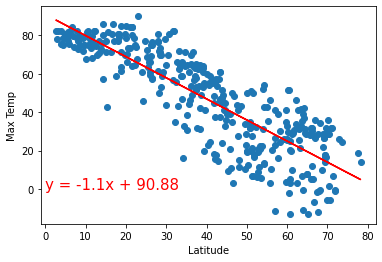

In [137]:
# Northern Hemisphere

correlation_coefficient = st.pearsonr(north_hem, temp_max_north)
correlation_coefficient = (correlation_coefficient[0],2)

# Linear regression equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_hem, temp_max_north)
regress_values = north_hem * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the linear regression model on top of the scatter plot

print(f'The r-value is: {correlation_coefficient[0]}')

plt.scatter(north_hem, temp_max_north)
plt.plot(north_hem,regress_values,"r-")

plt.annotate(line_eq,(0,0),fontsize=15,color="red")

plt.xlabel("Latitude")
plt.ylabel("Max Temp")

plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.5902169736287672


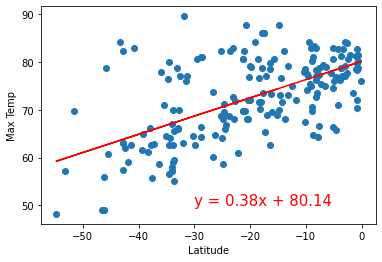

In [138]:
# City latitudes in southern hemisphere only
south_df = weather_df.loc[weather_df["Lat"] <= 0]
south_hem = south_df["Lat"]

# Max temps of cities in southern hemisphere only
temp_max_south = south_df["Max Temp"]

# Linear regression equation
correlation_coefficient = st.pearsonr(south_hem, temp_max_south)
correlation_coefficient = (correlation_coefficient[0],2)

(slope, intercept, rvalue, pvalue, stderr) = linregress(south_hem, temp_max_south)
regress_values = south_hem * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the linear regression model on top of the scatter plot

print(f'The r-value is: {correlation_coefficient[0]}')

plt.scatter(south_hem, temp_max_south)
plt.plot(south_hem,regress_values,"r-")

plt.annotate(line_eq,(-30,50),fontsize=15,color="red")

plt.xlabel("Latitude")
plt.ylabel("Max Temp")

plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [129]:
# Convert to integer for linear regression
weather_df["Humidity"] = weather_df["Humidity"]

# Humidity of cities in northern hemisphere only
humidity_north = north_df["Humidity"]

The r-value is: 0.36076860523753473


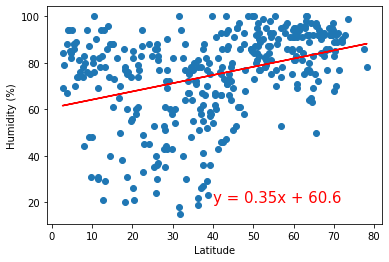

In [130]:
# Northern Hemisphere

correlation_coefficient = st.pearsonr(north_hem, humidity_north)
correlation_coefficient = (correlation_coefficient[0],2)

# Linear regression equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_hem, humidity_north)
regress_values = north_hem * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the linear regression model on top of the scatter plot

print(f'The r-value is: {correlation_coefficient[0]}')

plt.scatter(north_hem, humidity_north)
plt.plot(north_hem,regress_values,"r-")

plt.annotate(line_eq,(40,20),fontsize=15,color="red")

plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.3502377457736817


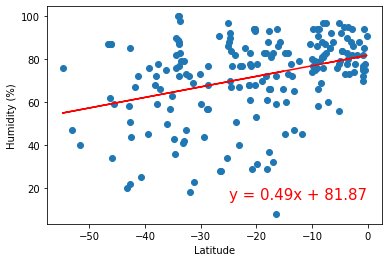

In [131]:
# Humidity of cities in southern hemisphere only
humidity_south = south_df["Humidity"]

# Southern Hemisphere

correlation_coefficient = st.pearsonr(south_hem, humidity_south)
correlation_coefficient = (correlation_coefficient[0],2)

# Linear regression equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_hem, humidity_south)
regress_values = south_hem * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the linear regression model on top of the scatter plot

print(f'The r-value is: {correlation_coefficient[0]}')

plt.scatter(south_hem, humidity_south)
plt.plot(south_hem,regress_values,"r-")

plt.annotate(line_eq,(-25,15),fontsize=15,color="red")

plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.30768912709322


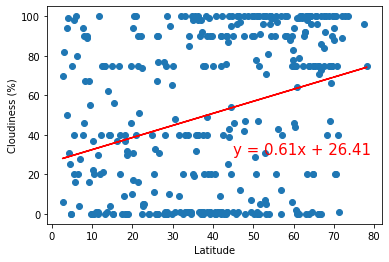

In [132]:
clouds_north = north_df["Cloudiness"]

# Northern Hemisphere

correlation_coefficient = st.pearsonr(north_hem, clouds_north)
correlation_coefficient = (correlation_coefficient[0],2)

# Linear regression equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_hem, clouds_north)
regress_values = north_hem * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the linear regression model on top of the scatter plot

print(f'The r-value is: {correlation_coefficient[0]}')

plt.scatter(north_hem, clouds_north)
plt.plot(north_hem,regress_values,"r-")

plt.annotate(line_eq,(45,30),fontsize=15,color="red")

plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.2236300911328375


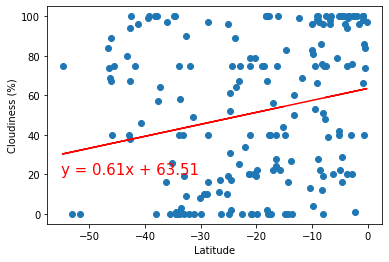

In [133]:
clouds_south = south_df["Cloudiness"]

# Southern Hemisphere

correlation_coefficient = st.pearsonr(south_hem, clouds_south)
correlation_coefficient = (correlation_coefficient[0],2)

# Linear regression equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_hem, clouds_south)
regress_values = south_hem * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the linear regression model on top of the scatter plot

print(f'The r-value is: {correlation_coefficient[0]}')

plt.scatter(south_hem, clouds_south)
plt.plot(south_hem,regress_values,"r-")

plt.annotate(line_eq,(-55,20),fontsize=15,color="red")

plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.22260375793693482


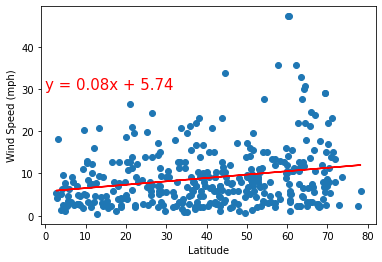

In [134]:
weather_df["Wind Speed"] = weather_df["Wind Speed"]
wind_north = north_df["Wind Speed"]

# Northern Hemisphere

correlation_coefficient = st.pearsonr(north_hem, wind_north)
correlation_coefficient = (correlation_coefficient[0],2)

# Linear regression equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_hem, wind_north)
regress_values = north_hem * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the linear regression model on top of the scatter plot

print(f'The r-value is: {correlation_coefficient[0]}')

plt.scatter(north_hem, wind_north)
plt.plot(north_hem,regress_values,"r-")

plt.annotate(line_eq,(0,30),fontsize=15,color="red")

plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

plt.show()


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.4173901592830796


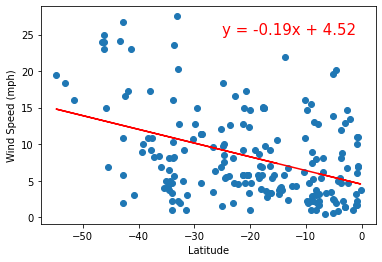

In [135]:
wind_south = south_df["Wind Speed"]


# Southern Hemisphere

correlation_coefficient = st.pearsonr(south_hem, wind_south)
correlation_coefficient = (correlation_coefficient[0],2)

# Linear regression equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_hem, wind_south)
regress_values = south_hem * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the linear regression model on top of the scatter plot

print(f'The r-value is: {correlation_coefficient[0]}')

plt.scatter(south_hem, wind_south)
plt.plot(south_hem, regress_values,"r-")

plt.annotate(line_eq,(-25,25),fontsize=15,color="red")

plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

plt.show()